In [5]:
import pandas as pd
from faker import Faker
import random

# Inicialize o Faker
fake = Faker('pt_BR')

# Lista para armazenar os dados
dados = []

# Gerar dados para 1000 alunos
for _ in range(1000):
    cpf = fake.unique.random_number(digits=11)
    nome = fake.name()
    idade = random.randint(18, 28)
    sexo = fake.random_element(elements=('M', 'F'))
    email = fake.email()
    nota_enem = random.randint(640, 800)
    abandono = fake.random_element(elements=(True, False))
    semestre = random.randint(1, 8) if abandono else None
    cra_segundo_semestre = random.uniform(5, 10)
    cra_quarto_semestre = random.uniform(5, 10)
    cra_sexto_semestre = random.uniform(5, 10)
    
    dados.append([cpf, nome, idade, sexo, email, nota_enem, abandono, semestre, cra_segundo_semestre, cra_quarto_semestre, cra_sexto_semestre])

# Criar DataFrame
df = pd.DataFrame(dados, columns=['CPF', 'Nome', 'Idade', 'Sexo', 'Email', 'Nota_ENEM', 'Abandono', 'Semestre', 'CRA_Segundo_Semestre', 'CRA_Quarto_Semestre', 'CRA_Sexto_Semestre'])

# Salvar DataFrame em um arquivo CSV
df.to_csv('dados_alunos.csv', index=False)

print("Dados salvos com sucesso em 'dados_alunos.csv'")


Dados salvos com sucesso em 'dados_alunos.csv'


Matplotlib is building the font cache; this may take a moment.


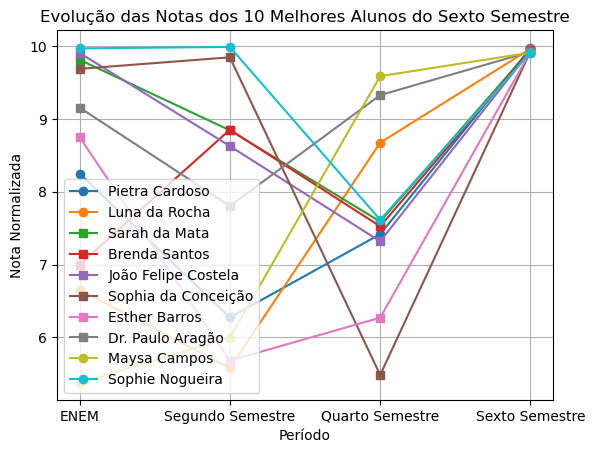

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
df = pd.read_csv('dados_alunos.csv')

# Relação de alunos por sexo
relacao_alunos_sexo = df['Sexo'].value_counts()

# Média da nota do ENEM agrupada por idade
media_nota_enem_por_idade = df.groupby('Idade')['Nota_ENEM'].mean()

# Normalizar as notas do ENEM para um valor entre 5 e 10
nota_minima = df['Nota_ENEM'].min()
nota_maxima = df['Nota_ENEM'].max()
df['Nota_ENEM_Normalizada'] = 5 + ((df['Nota_ENEM'] - nota_minima) / (nota_maxima - nota_minima)) * 5

# Selecionar os 10 alunos com melhor CRA no sexto semestre
melhores_alunos_sexto_semestre = df.nlargest(10, 'CRA_Sexto_Semestre')

# Preparar dados para o gráfico
fig, ax = plt.subplots()
for indice, aluno in melhores_alunos_sexto_semestre.iterrows():
    forma = 'o' if aluno['Sexo'] == 'F' else 's'
    ax.plot(['ENEM', 'Segundo Semestre', 'Quarto Semestre', 'Sexto Semestre'],
            [aluno['Nota_ENEM_Normalizada'], aluno['CRA_Segundo_Semestre'], aluno['CRA_Quarto_Semestre'], aluno['CRA_Sexto_Semestre']],
            marker=forma,
            label=aluno['Nome'])

plt.xlabel('Período')
plt.ylabel('Nota Normalizada')
plt.title('Evolução das Notas dos 10 Melhores Alunos do Sexto Semestre')
plt.legend()
plt.grid(True)
plt.show()
